In [3]:
# install modules
!pip install changefinder
# install any modules listed in next code cell here if not installed.

     |████████████████████████████████| 163kB 4.9MB/s 
  Created wheel for changefinder: filename=changefinder-0.3-cp36-none-any.whl size=3824 sha256=ac1db770efea29f783c8c9e1a2b5c93e9ed1615ba13bca1075e308d126914f81
  Stored in directory: /root/.cache/pip/wheels/ab/1c/de/3c0c0e4a6ee252b83ae19b252f3ae4f0a8ba4799c253afbd92
Successfully built changefinder


In [4]:
# import modules
import pandas as pd
import numpy as np
import changefinder
import pylab
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,7)
import seaborn as sns; sns.set()
import pandas_datareader as pdr
from scipy.stats import kurtosis, skew, probplot
from datetime import datetime
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.stats.stattools import jarque_bera   
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as smt
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from sklearn.metrics import mean_squared_error
print("All modules successfully installed")

All modules successfully installed


In [24]:
# download stock data from 01/01/2000 to 31/12/2018 for stock BAC, Bank of 
symbols = 'BAC'
start  = datetime(2000,1,1)
end    = datetime(2018,12,31)
BAC   = pdr.get_data_yahoo(symbols = symbols, start=start, end=end)
BAC_monthly = data = pdr.get_data_yahoo(symbols,start=start, end=end,interval='m')
print("Data downloaded")
print(BAC.head())
BAC_Adj_Close = BAC['Adj Close']
print("-----------------------")
print(BAC_Adj_Close.head())
BAC_daily_returns   = np.log(BAC_Adj_Close).diff().dropna()
print("-----------------------")
print(BAC_daily_returns.head())
print("-----------------------")
print(BAC_monthly.head())
# download data for Microsoft stock for multivariate analysis in cointergration
MSFT   = pdr.get_data_yahoo(symbols = 'MSFT', start=start, end=end)
MSFT_daily_returns   = np.log(MSFT['Adj Close']).diff().dropna()
print("-----------------------")
print(MSFT_daily_returns.head())

Data downloaded
                High       Low      Open     Close      Volume  Adj Close
Date                                                                     
2000-01-03  25.12500  24.00000  25.12500  24.21875  13705800.0  12.108177
2000-01-04  23.96875  22.46875  23.87500  22.78125  27293400.0  11.389502
2000-01-05  23.21875  22.25000  22.53125  23.03125  22855600.0  11.514487
2000-01-06  25.00000  23.37500  23.46875  25.00000  17307000.0  12.498768
2000-01-07  24.81250  24.00000  24.81250  24.34375  11632800.0  12.170673
-----------------------
Date
2000-01-03    12.108177
2000-01-04    11.389502
2000-01-05    11.514487
2000-01-06    12.498768
2000-01-07    12.170673
Name: Adj Close, dtype: float64
-----------------------
Date
2000-01-04   -0.061189
2000-01-05    0.010914
2000-01-06    0.082024
2000-01-07   -0.026601
2000-01-10   -0.035275
Name: Adj Close, dtype: float64
-----------------------
                High       Low      Open     Close       Volume  Adj Close
Date      

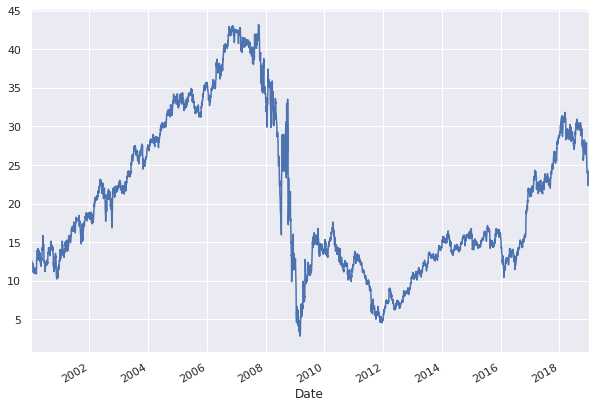

In [7]:
# plot price data 
BAC_Adj_Close.plot()
plt.show()

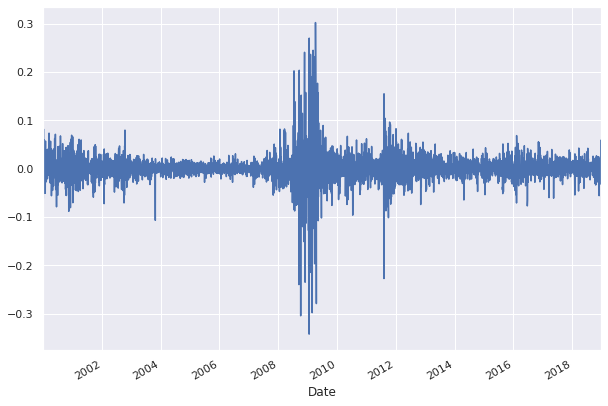

In [8]:
# plot returns data 
BAC_daily_returns.plot()
plt.show()


In [9]:
# Statistics mean, standard deviation, kurtosis and skew based on Adjusted Closing Prices
BAC_Adj_Close_mean        = BAC_Adj_Close.mean()
BAC_Adj_Close_std         = BAC_Adj_Close.std()
BAC_Adj_Close_skew        = skew(BAC_Adj_Close)
BAC_Adj_Close_kurtosis    = kurtosis(BAC_Adj_Close)
print(BAC_Adj_Close_mean,BAC_Adj_Close_std,BAC_Adj_Close_skew,BAC_Adj_Close_kurtosis )
print("---------------------------")
# Statistics mean, standard deviation, kurtosis and skew based on daily returns
BAC_daily_return_mean        = BAC_daily_returns.mean()
BAC_daily_return_std         = BAC_daily_returns.std()
BAC_daily_return_skew        = skew(BAC_daily_returns)
BAC_daily_return_kurtosis    = kurtosis(BAC_daily_returns)
print(BAC_daily_return_mean,BAC_daily_return_std,BAC_daily_return_skew,BAC_daily_return_kurtosis )

20.723826799414653 9.975582287459373 0.5375952238589173 -0.8027718906905914
---------------------------
0.00014513171786915784 0.02920538277799738 -0.3504415872115947 27.167546129612198


5 Day Simple Moving Average Date
2000-01-07    11.936321
2000-01-10    11.864453
2000-01-11    11.886326
2000-01-12    11.908198
2000-01-13    11.786334
Name: Adj Close, dtype: float64
10 Day Simple Moving Average Date
2000-01-14    11.906636
2000-01-18    11.895700
2000-01-19    11.956631
2000-01-20    11.982019
2000-01-21    11.874217
Name: Adj Close, dtype: float64
20 Day Simple Moving Average Date
2000-01-31    11.801373
2000-02-01    11.808403
2000-02-02    11.835744
2000-02-03    11.840431
2000-02-04    11.788874
Name: Adj Close, dtype: float64
50 Day Simple Moving Average Date
2000-03-14    11.528397
2000-03-15    11.520682
2000-03-16    11.544589
2000-03-17    11.569830
2000-03-20    11.573469
Name: Adj Close, dtype: float64
200 Day Simple Moving Average Date
2000-10-16    12.871514
2000-10-17    12.867721
2000-10-18    12.866775
2000-10-19    12.867692
2000-10-20    12.863273
Name: Adj Close, dtype: float64


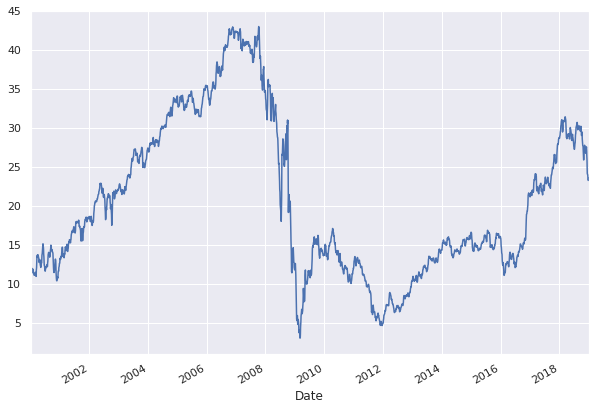

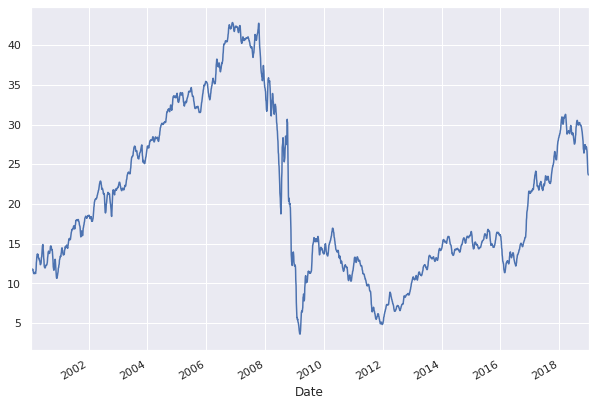

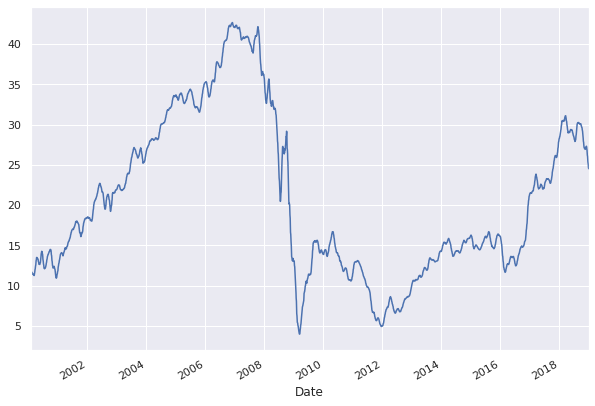

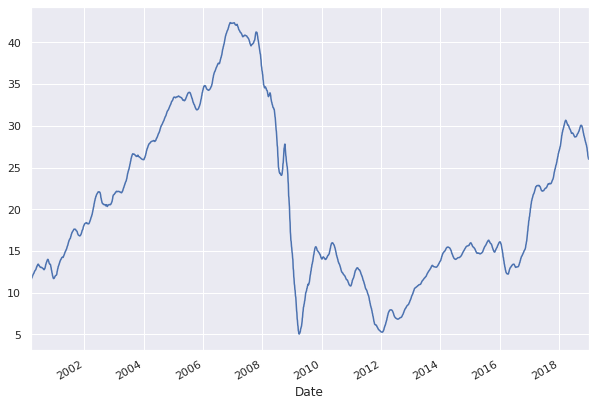

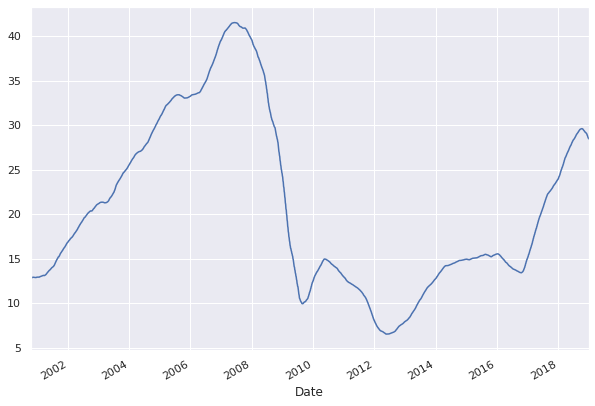

In [11]:
# Technical indicators Moving Average
# Simple Moving Average 
def MA(ndays): 
 return BAC_Adj_Close.rolling(window=ndays).mean().dropna()
#  MA(5), MA(10), MA(20), MA(50),MA(200) moving averages 5day, 10day, 20day, 50day, 200day
print("5 Day Simple Moving Average",MA(5).head())
print("10 Day Simple Moving Average",MA(10).head())
print("20 Day Simple Moving Average",MA(20).head())
print("50 Day Simple Moving Average",MA(50).head())
print("200 Day Simple Moving Average",MA(200).head())

# Moving Average Plots
MA(5).plot()
plt.show()
MA(10).plot()
plt.show()
MA(20).plot()
plt.show()
MA(50).plot()
plt.show()
MA(200).plot()
plt.show()


5 Day EWMA Moving Average Date
2000-01-03    12.108177
2000-01-04    11.676972
2000-01-05    11.600005
2000-01-06    11.973338
2000-01-07    12.049092
Name: Adj Close, dtype: float64
10 Day EWMA Moving Average Date
2000-01-03    12.108177
2000-01-04    11.712906
2000-01-05    11.633143
2000-01-06    11.918328
2000-01-07    11.990769
Name: Adj Close, dtype: float64
20 Day EWMA Moving Average Date
2000-01-03    12.108177
2000-01-04    11.730872
2000-01-05    11.651417
2000-01-06    11.896034
2000-01-07    11.962467
Name: Adj Close, dtype: float64
50 Day EWMA Moving Average Date
2000-01-03    12.108177
2000-01-04    11.741653
2000-01-05    11.662882
2000-01-06    11.884556
2000-01-07    11.946447
Name: Adj Close, dtype: float64
200 Day EWMA Moving Average Date
2000-01-03    12.108177
2000-01-04    11.747043
2000-01-05    11.668748
2000-01-06    11.879376
2000-01-07    11.938806
Name: Adj Close, dtype: float64


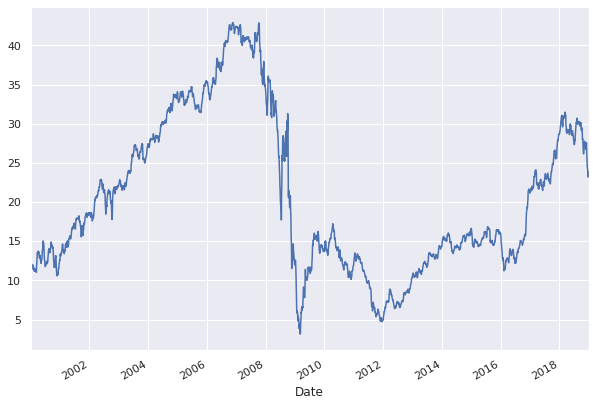

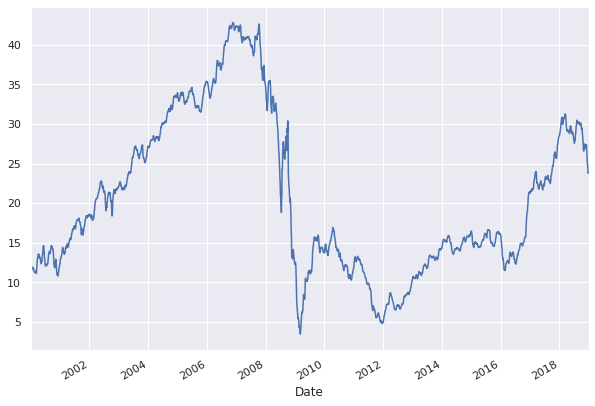

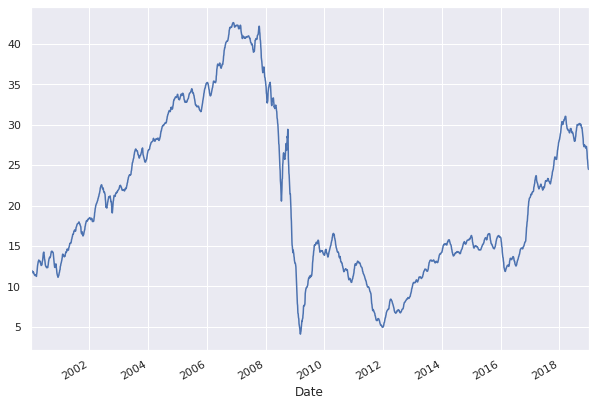

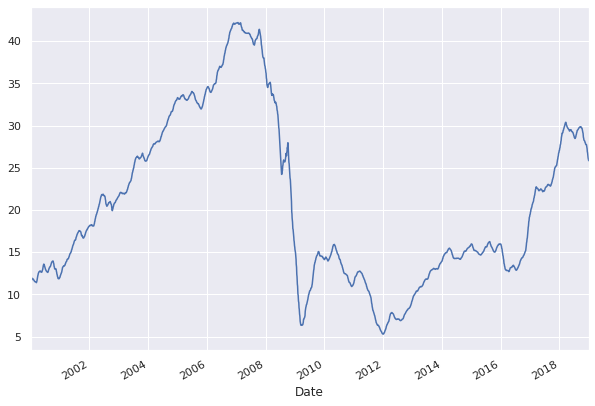

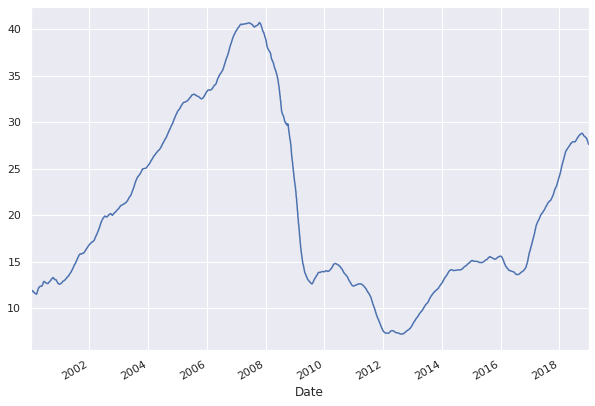

In [13]:
# Technical indicators Exponential Weighted Moving Average
# Exponential Moving Average 
def EWMA(ndays): 
 return BAC_Adj_Close.ewm(span=ndays).mean().dropna()
#  EWMA(5), EWMA(10), EWMA(20), EWMA(50),EWMA(200) ewma moving averages 5day, 10day, 20day, 50day, 200day
print("5 Day EWMA Moving Average",EWMA(5).head())
print("10 Day EWMA Moving Average",EWMA(10).head())
print("20 Day EWMA Moving Average",EWMA(20).head())
print("50 Day EWMA Moving Average",EWMA(50).head())
print("200 Day EWMA Moving Average",EWMA(200).head())

# Moving Average Plots
EWMA(5).plot()
plt.show()
EWMA(10).plot()
plt.show()
EWMA(20).plot()
plt.show()
EWMA(50).plot()
plt.show()
EWMA(200).plot()
plt.show()



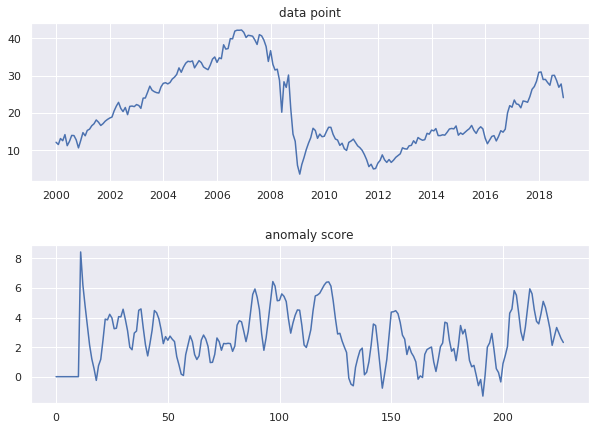

In [14]:
# Structural breaks price data
# Best package is strucchange in R, since using Python will use ruptures or changefinder packages
# Made use of monthly price data as opposed to daily to better capture structural breaks 
f, (ax1, ax2) = plt.subplots(2, 1)
f.subplots_adjust(hspace=0.4)
ax1.plot(BAC_monthly['Adj Close'])
ax1.set_title("data point")
#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(point) for point in BAC_monthly['Adj Close']]
ax2.plot(scores)
ax2.set_title("anomaly score")
plt.show() 

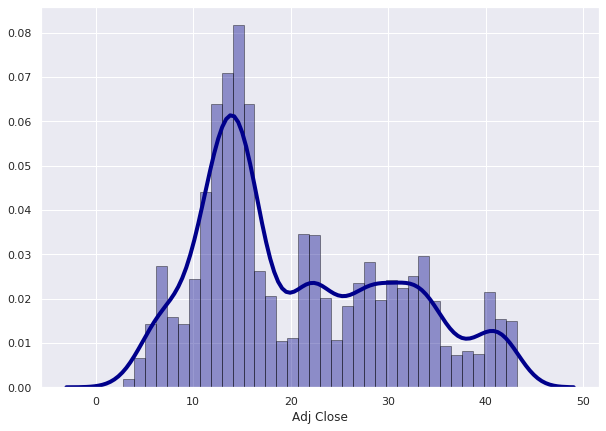

In [15]:
# Check whether time series data matches normal distribution
# 1. Kernel Density Plot price data
sns.distplot(BAC_Adj_Close, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})



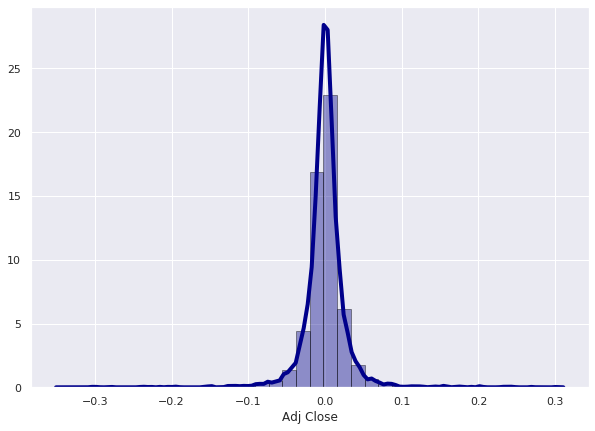

In [16]:
# Check whether time series data matches normal distribution
# 2. Kernel Density Plot returns data
sns.distplot(BAC_daily_returns, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

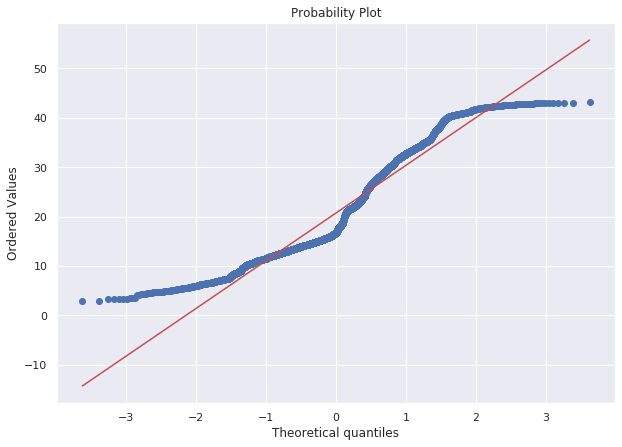

In [17]:
# Check whether time series data matches normal distribution
# 3. QQ Plot price data
probplot(BAC_Adj_Close, dist="norm", plot = pylab )
pylab.show()

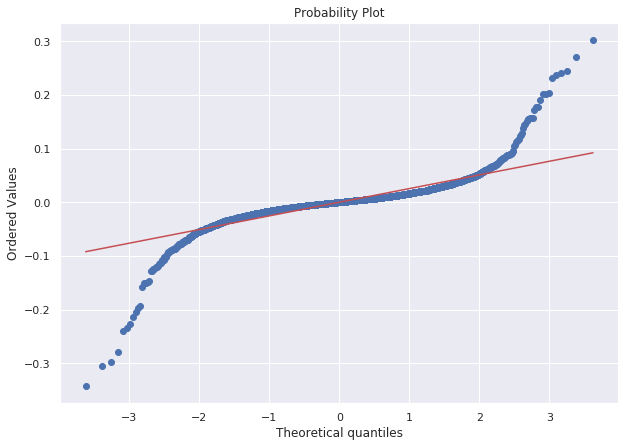

In [18]:
# Check whether time series data matches normal distribution
# 4. QQ Plot returns data 
probplot(BAC_daily_returns, dist="norm", plot = pylab )
pylab.show()

In [19]:
# Check whether time series data matches normal distribution
# 5. Jacques Bera Test price data
# test matches the skewness and kurtosis of data to see if it matches a normal distribution.
# null hypothesis - data is normally distributed; 
# alternate hypothesis - data does not come from a normal distribution.
# reject null hypothesis if p-value is statistically significant e.g p<0.01 level
print("Test Statistic-", "p-value-","Skew-","Kurtosis-")
jarque_bera(BAC_Adj_Close)

Test Statistic- p-value- Skew- Kurtosis-


(358.52002391289665,
 1.4072329044441954e-78,
 0.5375952238589173,
 2.1972281093094086)

In [20]:
# Check whether time series data matches normal distribution
# 5. Jacques Bera Test returns data
# test matches the skewness and kurtosis of data to see if it matches a normal distribution.
# null hypothesis - data is normally distributed; 
# alternate hypothesis - data does not come from a normal distribution.
print("Test Statistic-", "p-value-","Skew-","Kurtosis-")
jarque_bera(BAC_daily_returns)

Test Statistic- p-value- Skew- Kurtosis-


(147036.34041915784, 0.0, -0.3504415872115947, 30.167546129612198)

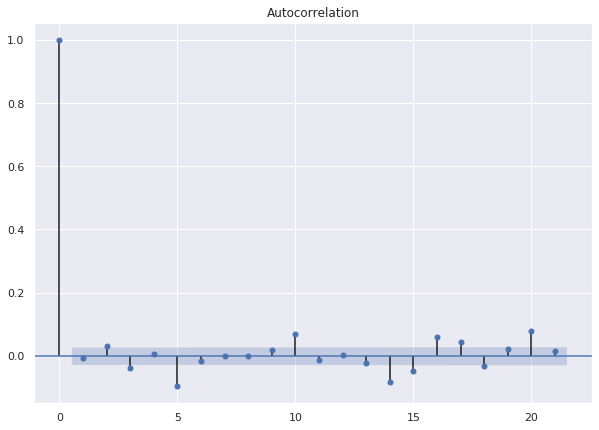

In [21]:
# Time Series Analysis daily returns data (stationarity,cointergration, ARIMA models etc)
# 1. AutoCorrelation and Partial AutoCorrelation Plots
plot_acf(BAC_daily_returns,lags=21)
plt.show()

In [22]:
# Time Series Analysis daily returns data (stationarity,cointergration, ARIMA models etc)
# 2. Augmented Dickey Fuller Tests
# is a unit root test
# null hypothesis - time series is not stationary
# alternate hypothetis - time series is stationary
# check critical values lower than test statistic various levels 1%, 5%, 10%
result = adfuller(BAC_daily_returns)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.717734
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [33]:
# Time Series Analysis daily returns data (stationarity,cointergration, ARIMA models etc)
# 3. Johansen Test for cointergration
# Apply cointergration between pairs of assets 'MSFT' Microsfot and 'BAC' stocks
returns = pd.merge(BAC_daily_returns,MSFT_daily_returns,how='inner',on='Date')
result  = coint_johansen(returns, det_order=0, k_ar_diff=1)
print(result.eig, result.lr1,result.lr2,result.cvt,result.cvm)

[0.35866001 0.30881541] [3885.48572692 1764.00774443] [2121.47798249 1764.00774443] [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]] [[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]


(4778,)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


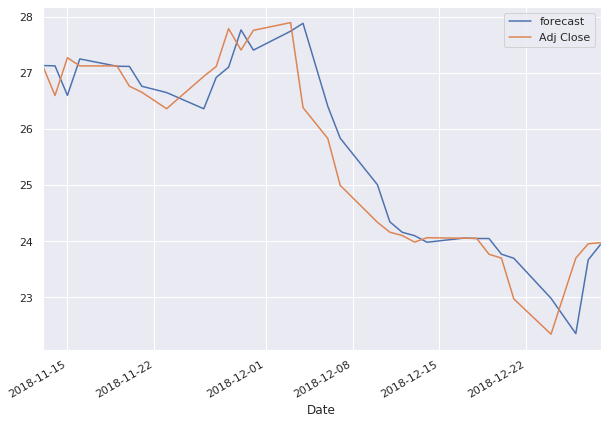

In [34]:
# Time Series Analysis daily returns data (stationarity,cointergration, ARIMA models etc)
# Fitting an AR(1) model and using it to forecast 
# 4. AR(1) model is same as ARIMA(1,1,0) where Intergration(1) differencing 1 has been applied
# Forecast the first AR(1) model
# need to recheck this prediction and plot???

# Forecast and compare 30 days worth of data
print(BAC_daily_returns.shape)

model  = ARMA(BAC_Adj_Close, order=(1,1,0))
result = model.fit()
result.plot_predict(start=4747, end=4777)
plt.show()


